In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
sys.path.append('..')

from src.data_preprocessing import load_data, create_binary_labels, preprocess_data

from src.logistic_regression import LogisticRegression, KernelLogisticRegression
from src.svm import SVM, KernelSVM
from src.kernels import create_kernel_function

from src.evaluation import (
    calculate_metrics, 
    print_metrics,
    plot_confusion_matrix,
    plot_training_curves,
    plot_all_metrics_comparison,
    cross_validate
)

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
wines = load_data('../data/winequality-red.csv', '../data/winequality-white.csv')

# Create binary labels
wines = create_binary_labels(wines, threshold=6)

# Preprocess
X_train, X_test, y_train, y_test, mean, std = preprocess_data(
    wines, test_size=0.2, random_state=42, normalize=True
)

print(f"\nData loaded and preprocessed!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(f"  Bad wines (0): {np.sum(y_train == 0)}")
print(f"  Good wines (1): {np.sum(y_train == 1)}")


Loaded 1599 red wines and 4898 white wines
Total dataset size: 6497 samples

Dataset shape: (6497, 13)

Binary label distribution:
Bad wines (quality < 6): 2384 (36.7%)
Good wines (quality >= 6): 4113 (63.3%)

Train set size: 5199 samples
Test set size: 1298 samples
Train label distribution: Bad=1908, Good=3291
Test label distribution: Bad=476, Good=822

Features normalized (standardization: mean=0, std=1)

Data loaded and preprocessed!
Training samples: 5199
Test samples: 1298
Features: 12

Class distribution in training set:
  Bad wines (0): 1908
  Good wines (1): 3291


Iteration 100/1000 - Loss: 0.5324, Accuracy: 0.7246
Iteration 200/1000 - Loss: 0.5210, Accuracy: 0.7334
Iteration 300/1000 - Loss: 0.5184, Accuracy: 0.7351
Iteration 400/1000 - Loss: 0.5176, Accuracy: 0.7359
Iteration 500/1000 - Loss: 0.5173, Accuracy: 0.7376
Iteration 600/1000 - Loss: 0.5172, Accuracy: 0.7386
Iteration 700/1000 - Loss: 0.5171, Accuracy: 0.7394
Iteration 800/1000 - Loss: 0.5171, Accuracy: 0.7394
Iteration 900/1000 - Loss: 0.5171, Accuracy: 0.7399
Iteration 1000/1000 - Loss: 0.5171, Accuracy: 0.7399

Training completed!
Final Loss: 0.5171
Final Accuracy: 0.7399

Logistic Regression - Performance Metrics
Accuracy:  0.7565 (75.65%)
Precision: 0.7824 (78.24%)
Recall:    0.8528 (85.28%)
F1-Score:  0.8161 (81.61%)

Confusion Matrix:
  True Positives:  701
  True Negatives:  281
  False Positives: 195
  False Negatives: 121



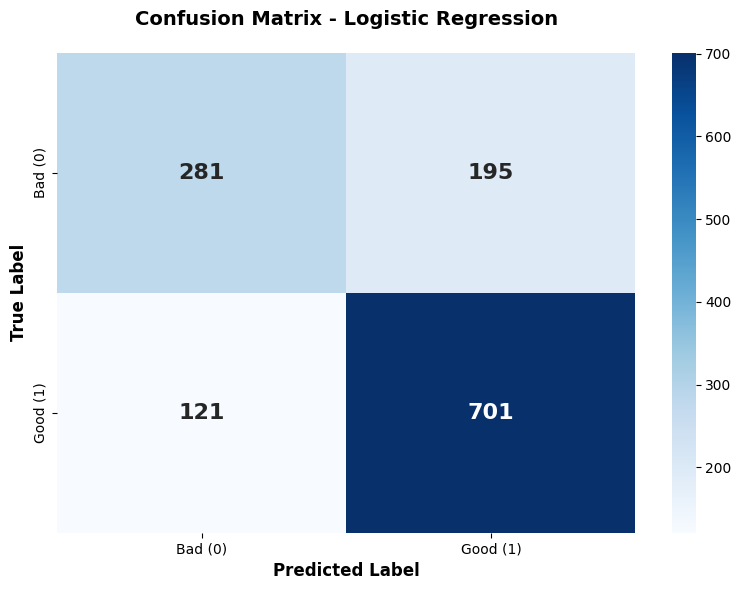

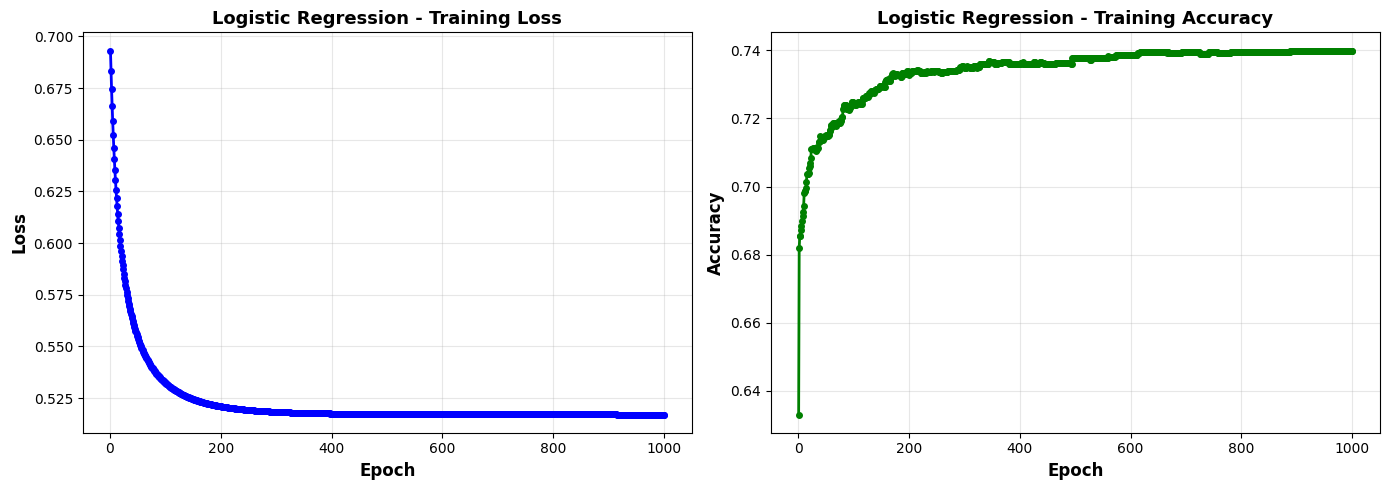

In [9]:
# Train logistic regression
lr = LogisticRegression(
    learning_rate=0.1,
    n_iterations=1000,
    regularization=0.01,
    verbose=True
)

lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
metrics = calculate_metrics(y_test, y_pred)
print_metrics(metrics, "Logistic Regression")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")

# Plot training curves
plot_training_curves(lr.history, "Logistic Regression")

Iteration 100/1000 - Loss: 0.9633, Accuracy: 0.6824
Iteration 200/1000 - Loss: 0.9316, Accuracy: 0.6836
Iteration 300/1000 - Loss: 0.9043, Accuracy: 0.6815
Iteration 400/1000 - Loss: 0.8808, Accuracy: 0.6796
Iteration 500/1000 - Loss: 0.8602, Accuracy: 0.6807
Iteration 600/1000 - Loss: 0.8424, Accuracy: 0.6782
Iteration 700/1000 - Loss: 0.8278, Accuracy: 0.6807
Iteration 800/1000 - Loss: 0.8166, Accuracy: 0.6836
Iteration 900/1000 - Loss: 0.8086, Accuracy: 0.6815
Iteration 1000/1000 - Loss: 0.8025, Accuracy: 0.6807

Training completed!
Final Loss: 0.8025
Final Accuracy: 0.6807

SVM - Performance Metrics
Accuracy:  0.6934 (69.34%)
Precision: 0.7404 (74.04%)
Recall:    0.7944 (79.44%)
F1-Score:  0.7664 (76.64%)

Confusion Matrix:
  True Positives:  653
  True Negatives:  247
  False Positives: 229
  False Negatives: 169



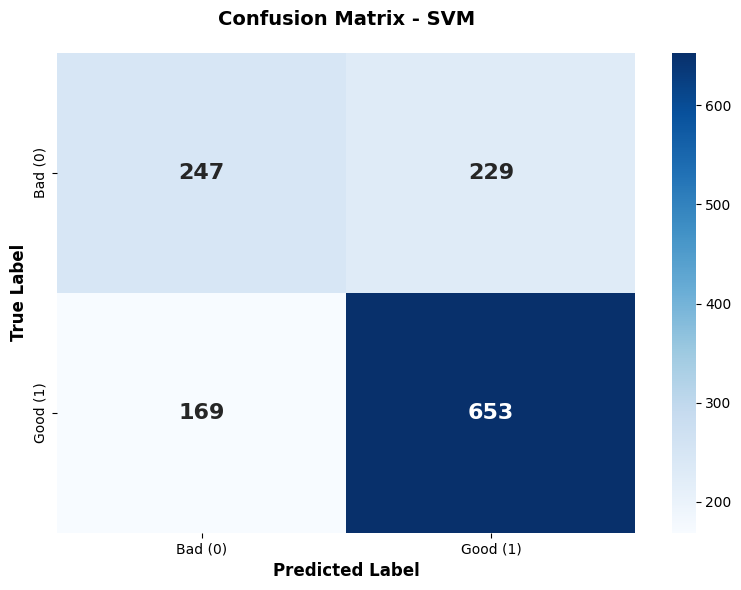

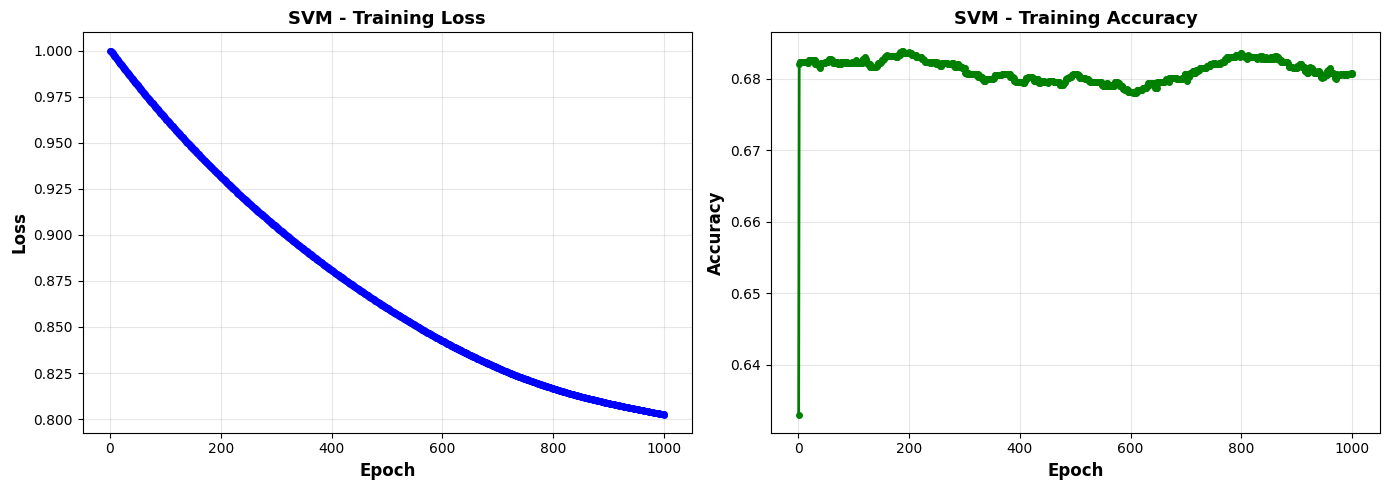

In [10]:
# Train SVM
svm = SVM(
    learning_rate=0.001,
    n_iterations=1000,
    C=1.0,
    verbose=True
)

svm.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm.predict(X_test)
metrics_svm = calculate_metrics(y_test, y_pred_svm)
print_metrics(metrics_svm, "SVM")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# Plot training curves
plot_training_curves(svm.history, "SVM")


Testing learning_rate = 0.01
  Accuracy: 0.7488, F1: 0.8100

Testing learning_rate = 0.05
  Accuracy: 0.7527, F1: 0.8128

Testing learning_rate = 0.1
  Accuracy: 0.7565, F1: 0.8161

Testing learning_rate = 0.2
  Accuracy: 0.7527, F1: 0.8135


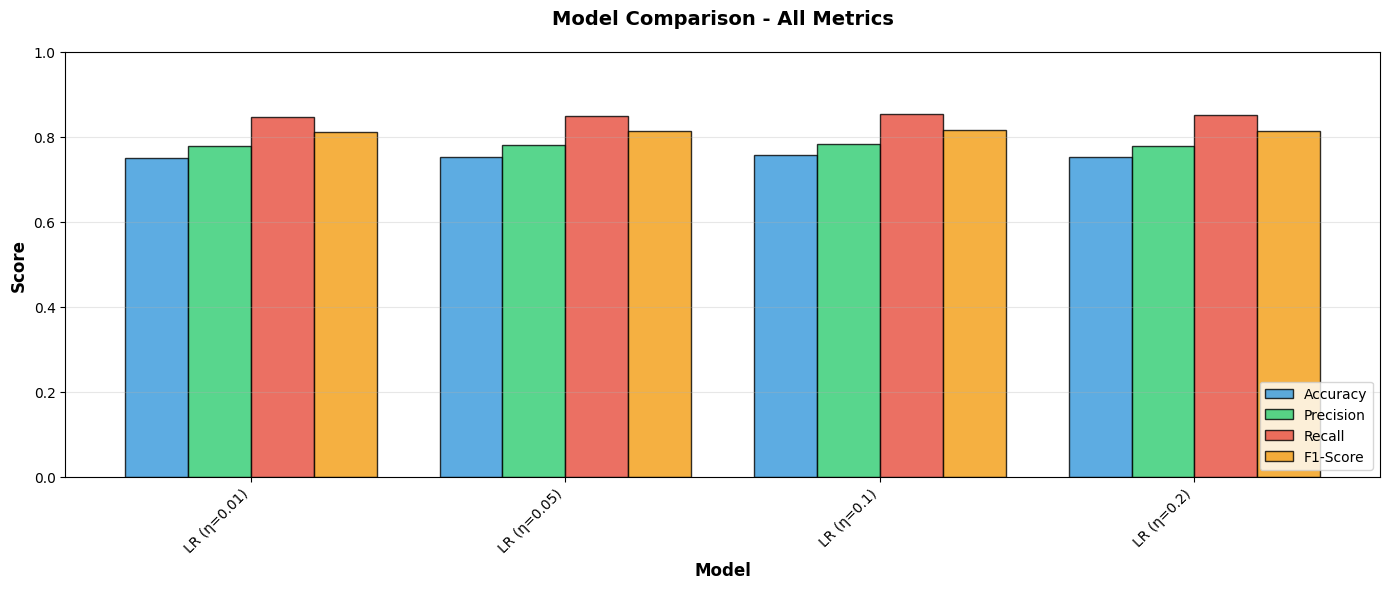

In [11]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2]
results_lr_rates = {}

for lr_rate in learning_rates:
    print(f"\nTesting learning_rate = {lr_rate}")
    
    model = LogisticRegression(
        learning_rate=lr_rate,
        n_iterations=1000,
        regularization=0.01,
        verbose=False
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = calculate_metrics(y_test, y_pred)
    results_lr_rates[f'LR (η={lr_rate})'] = metrics
    
    print(f"  Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1_score']:.4f}")

# Compare results
plot_all_metrics_comparison(results_lr_rates)



Testing regularization = 0.0
  Accuracy: 0.7565, F1: 0.8161

Testing regularization = 0.001
  Accuracy: 0.7565, F1: 0.8161

Testing regularization = 0.01
  Accuracy: 0.7565, F1: 0.8161

Testing regularization = 0.1
  Accuracy: 0.7565, F1: 0.8161

Testing regularization = 1.0
  Accuracy: 0.7558, F1: 0.8156


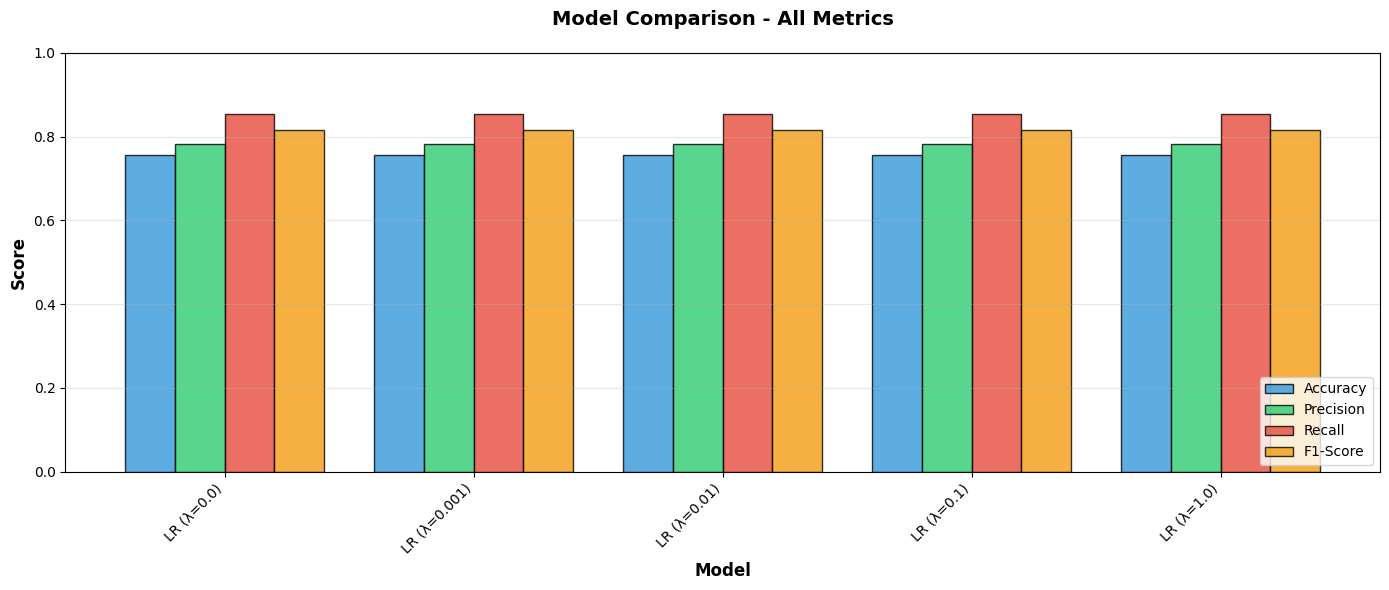

In [12]:
# Test different regularization values
regularization_values = [0.0, 0.001, 0.01, 0.1, 1.0]
results_regularization = {}

for reg in regularization_values:
    print(f"\nTesting regularization = {reg}")
    
    model = LogisticRegression(
        learning_rate=0.1,
        n_iterations=1000,
        regularization=reg,
        verbose=False
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = calculate_metrics(y_test, y_pred)
    results_regularization[f'LR (λ={reg})'] = metrics
    
    print(f"  Accuracy: {metrics['accuracy']:.4f}, F1: {metrics['f1_score']:.4f}")

# Compare results
plot_all_metrics_comparison(results_regularization)